# Introduction
This notebook focuses on the classification task using the `weather_classification_data.csv` dataset. The primary objective is to apply data cleaning, preparation, exploratory data analysis, visualization, and classification model building to predict weather conditions based on various features.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning and Preparation
Data cleaning and preparation are crucial steps in the data analysis pipeline. The steps involved include:

1. **Loading Data**: The dataset is loaded into a pandas DataFrame to facilitate easy data manipulation and analysis.
2. **Handling Missing Values**: Any missing values in the dataset are identified and handled appropriately to ensure the dataset is complete.
3. **Encoding Categorical Variables**: Since machine learning models require numerical input, categorical variables are converted to numerical values using techniques like label encoding.
4. **Normalizing/Standardizing Numerical Features**: Features are scaled to have a mean of 0 and a standard deviation of 1 to ensure that the models perform optimally.
5. **Data Splitting**: The dataset is split into training and testing sets using an 80-20 split to evaluate the model's performance on unseen data.


In [6]:
# Load the datasets
weather_data = pd.read_csv('weather_classification_data.csv')
# Display the first few rows of each dataset
print("Weather Data")
print(weather_data.head())

Weather Data
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


In [7]:
# Checking for missing values
print("Missing values in weather data:\n", weather_data.isnull().sum())

Missing values in weather data:
 Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the columns
categorical_cols = ['Cloud Cover', 'Season', 'Location']
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Verify columns
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Encode the target column if it's not already categorical
if weather_data["Weather Type"].dtype == 'object':
    le = LabelEncoder()
    weather_data["Weather Type"] = le.fit_transform(weather_data["Weather Type"].astype(str))

# Separate features and target
X_weather = weather_data.drop(columns=["Weather Type"])
y_weather = weather_data["Weather Type"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply transformations to the features
X_weather = preprocessor.fit_transform(X_weather)

# Split the data into training and testing sets
X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split(X_weather, y_weather, test_size=0.2, random_state=42)

print("Data preprocessing and splitting done successfully.")


Categorical columns: ['Cloud Cover', 'Season', 'Location']
Numerical columns: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
Data preprocessing and splitting done successfully.


# Data Analysis and Visualization
Exploratory Data Analysis (EDA) helps in understanding the dataset's underlying structure, detecting patterns, spotting anomalies, and checking assumptions. Key steps include:

1. **Summary Statistics**: Generate summary statistics (mean, median, standard deviation) to understand the distribution and central tendency of the data.
2. **Histograms**: Visualize the distribution of individual features to understand their spread and identify any skewness.
3. **Scatter Plots**: Examine relationships between pairs of features to identify potential correlations.
4. **Box Plots**: Detect outliers and understand the spread of the data.
5. **Correlation Heatmaps**: Visualize correlations between features to identify multicollinearity and feature dependencies.


In [9]:
# Generating summary statistics
print("Weather Data Summary")
print(weather_data.describe())

Weather Data Summary
        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000  

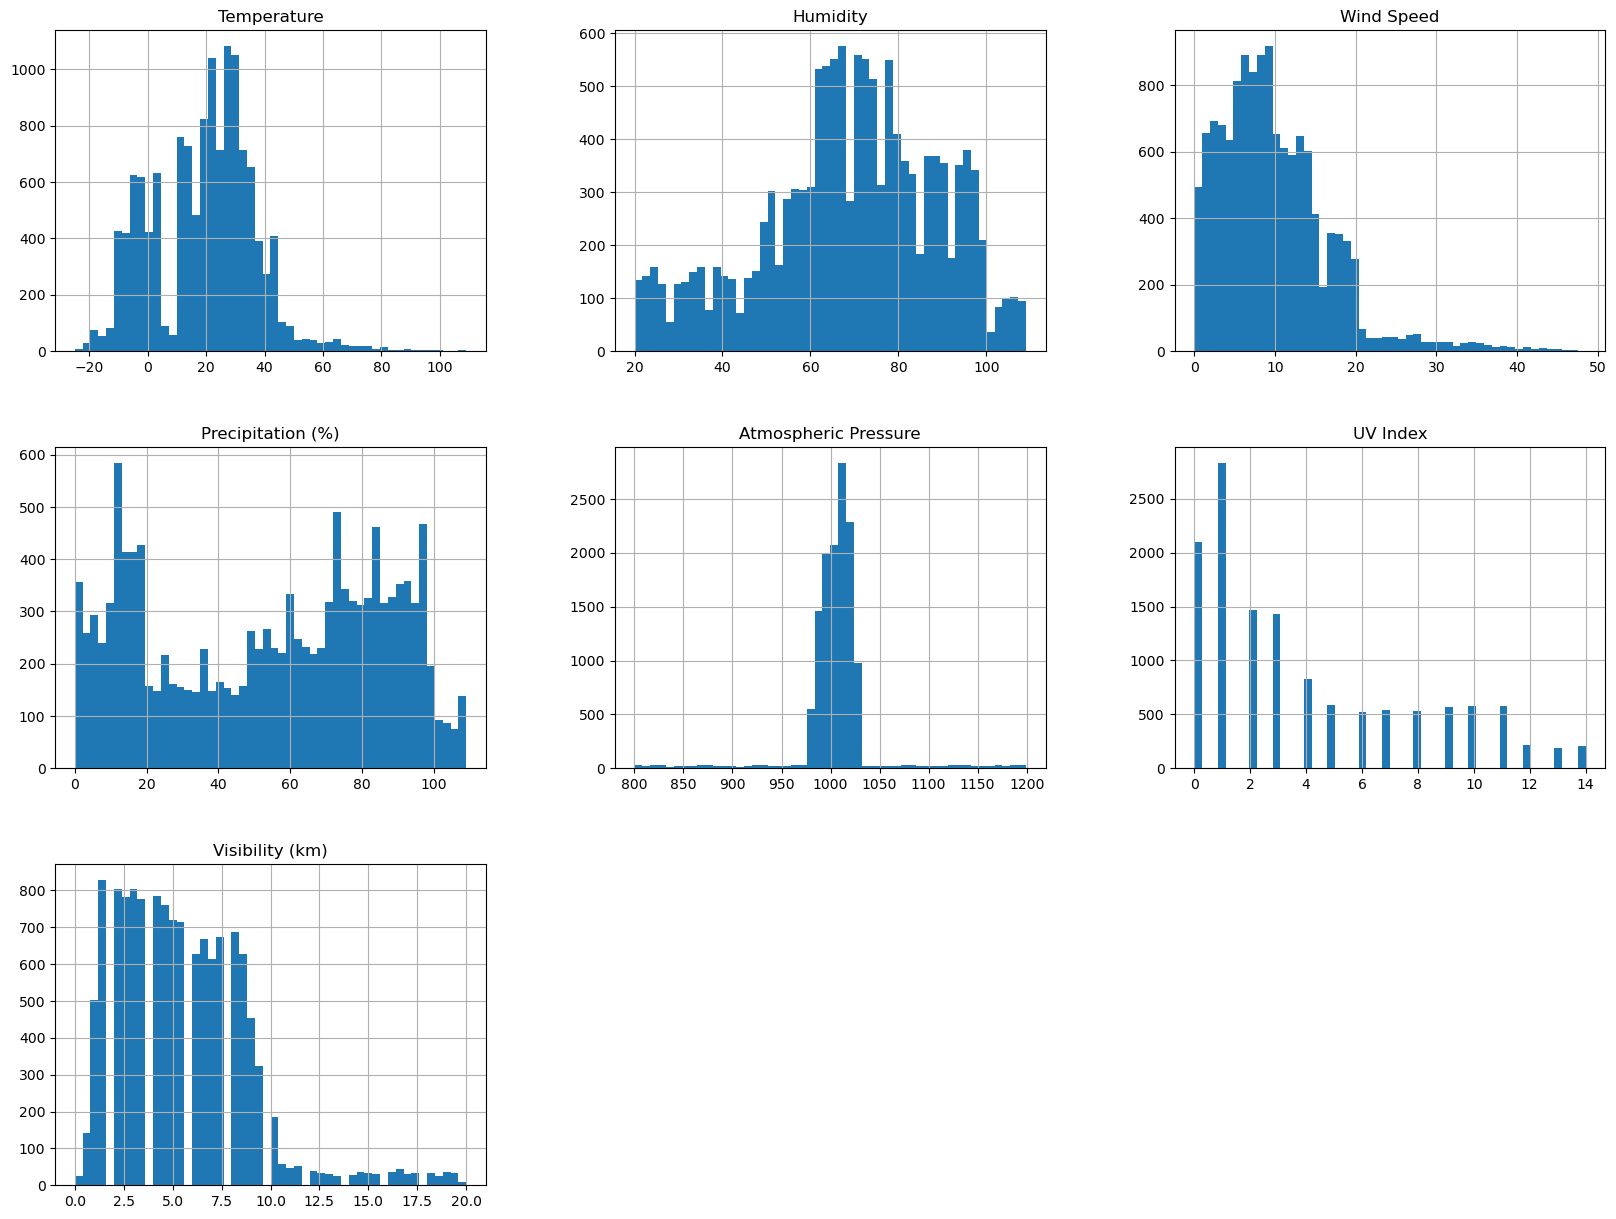

In [11]:
import matplotlib.pyplot as plt
# Histograms
weather_data.hist(bins=50, figsize=(20,15))
plt.show()


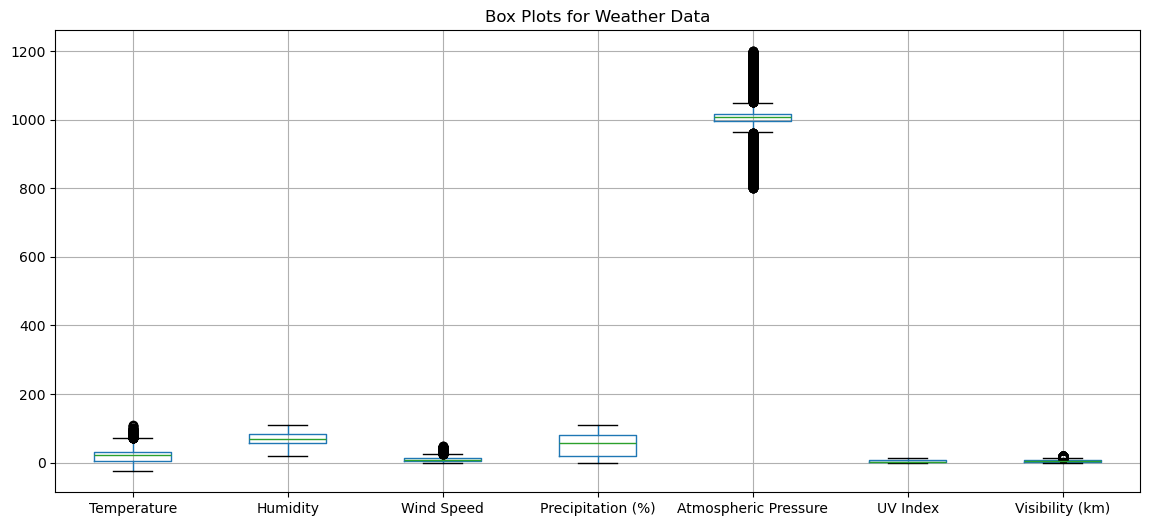

In [12]:
# Box plots for weather data
plt.figure(figsize=(14, 6))
weather_data.boxplot()
plt.title('Box Plots for Weather Data')
plt.show()

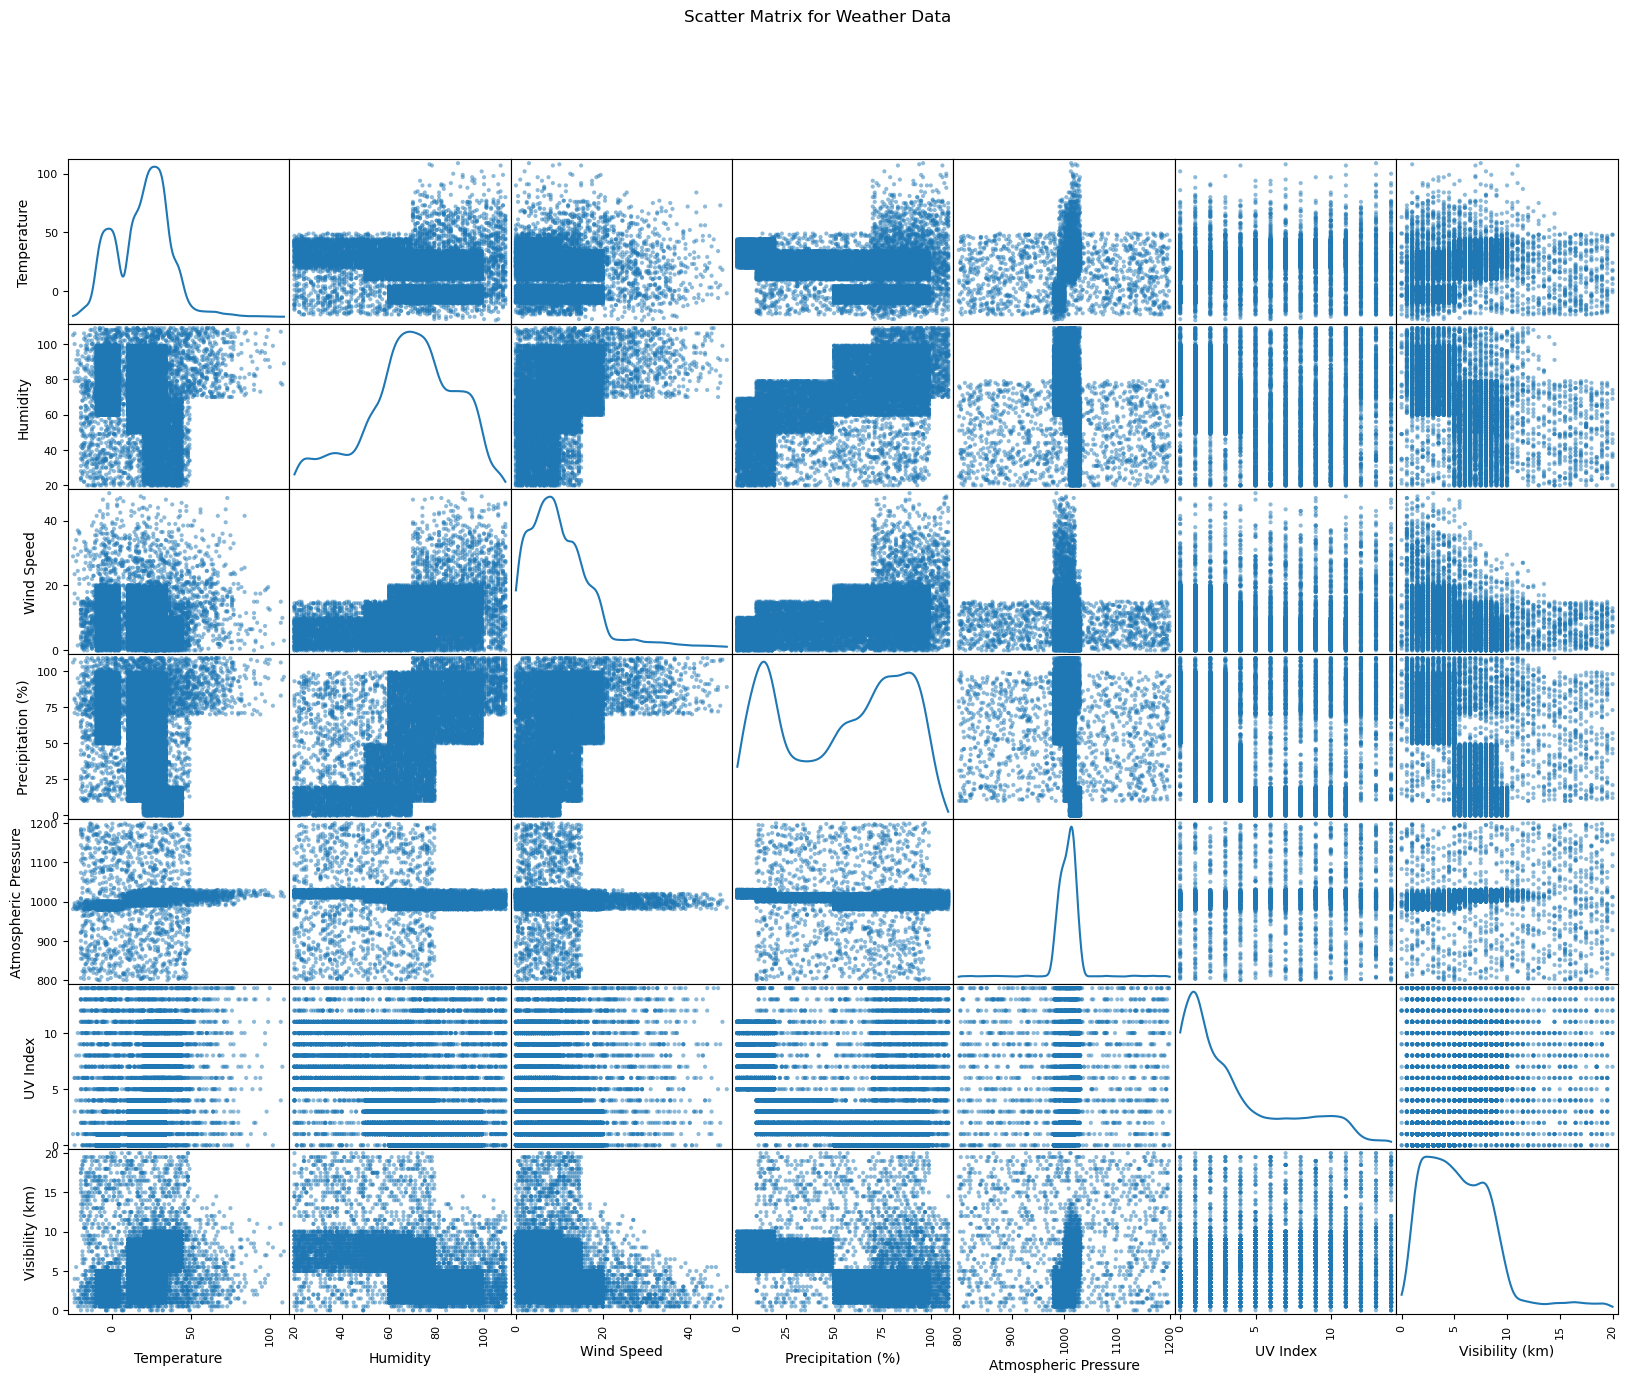

In [13]:
from pandas.plotting import scatter_matrix

# Scatter matrix for weather data
scatter_matrix(weather_data, figsize=(20, 15), diagonal='kde')
plt.suptitle('Scatter Matrix for Weather Data')
plt.show()

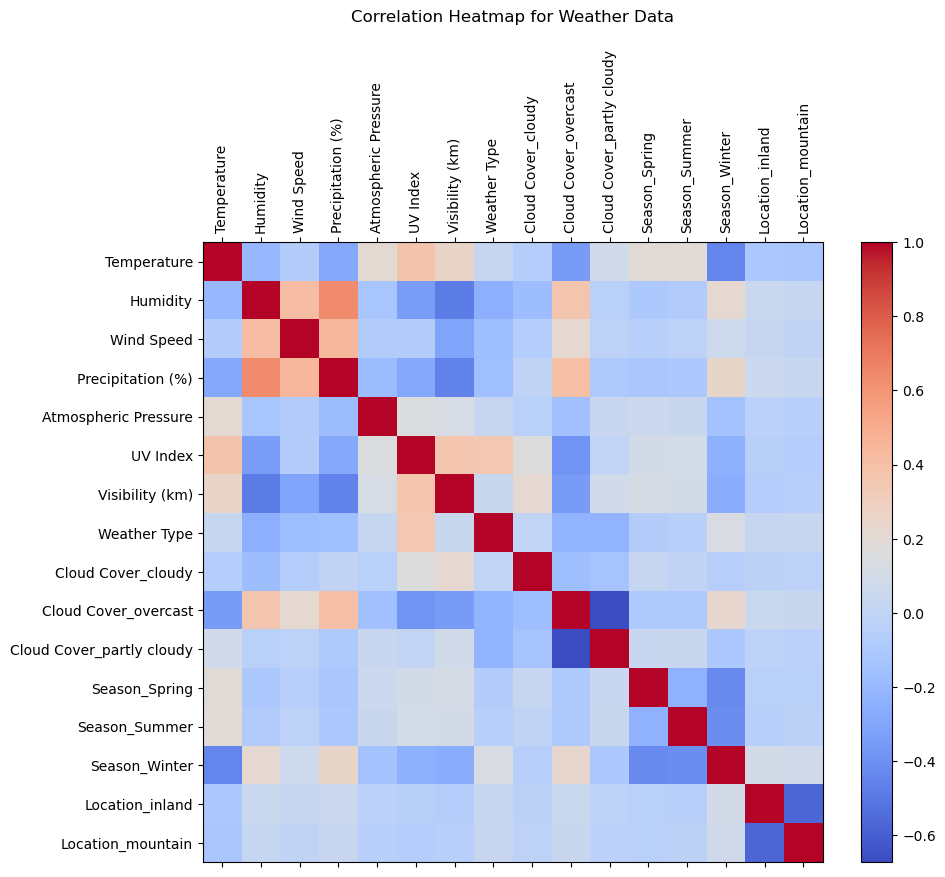

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the columns
categorical_cols = ['Cloud Cover', 'Season', 'Location']
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# One-hot encode the categorical columns
weather_data_encoded = pd.get_dummies(weather_data, columns=categorical_cols, drop_first=True)

# Calculate the correlation matrix
corr_weather = weather_data_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
cax = plt.matshow(corr_weather, cmap='coolwarm', fignum=1)
plt.colorbar(cax)
plt.xticks(range(len(corr_weather.columns)), corr_weather.columns, rotation=90)
plt.yticks(range(len(corr_weather.columns)), corr_weather.columns)
plt.title('Correlation Heatmap for Weather Data', pad=20)
plt.show()


# Model Building
This section involves training various classification models on the weather dataset. The models chosen include:

1. **Logistic Regression**: A linear model suitable for binary classification tasks. It estimates the probability of a binary response based on one or more predictor variables.
2. **Decision Tree Classifier**: A non-linear model that splits the data into subsets based on feature values, creating a tree-like structure.
3. **Random Forest Classifier**: An ensemble model that combines multiple decision trees to improve accuracy and prevent overfitting.

Each model is trained on the training set and evaluated on the testing set. The performance is measured using metrics like precision, recall, F1-score, and accuracy.


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_weather, y_train_weather)
y_pred_log_reg = log_reg.predict(X_test_weather)
print("Logistic Regression Performance")
print(classification_report(y_test_weather, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test_weather, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test_weather, y_pred_log_reg))

# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train_weather, y_train_weather)
y_pred_tree = tree.predict(X_test_weather)
print("Decision Tree Performance")
print(classification_report(y_test_weather, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test_weather, y_pred_tree))
print("Accuracy:", accuracy_score(y_test_weather, y_pred_tree))

# Random Forest
forest = RandomForestClassifier()
forest.fit(X_train_weather, y_train_weather)
y_pred_forest = forest.predict(X_test_weather)
print("Random Forest Performance")
print(classification_report(y_test_weather, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test_weather, y_pred_forest))
print("Accuracy:", accuracy_score(y_test_weather, y_pred_forest))


Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       651
           1       0.86      0.84      0.85       647
           2       0.89      0.94      0.91       701
           3       0.92      0.86      0.89       641

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640

Confusion Matrix:
 [[549  57  20  25]
 [ 46 543  50   8]
 [ 20   8 659  14]
 [ 52  25  15 549]]
Accuracy: 0.8712121212121212
Decision Tree Performance
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       651
           1       0.89      0.89      0.89       647
           2       0.93      0.95      0.94       701
           3       0.92      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
we

# Conclusion
In this notebook, we performed a comprehensive classification task on the weather dataset. We cleaned and prepared the data, conducted EDA, visualized key insights, built and evaluated multiple classification models, and compared their performances. Future work could involve hyperparameter tuning and exploring additional advanced models to further improve accuracy.
